# Comparison of simulation and experimental results by Trinh and Wang, 1982
**Paper**:  
"Large-amplitude free and driven drop-shape oscillations: Experimental observations"  
Trinh and Wang, 1982, [DOI](https://doi.org/10.1017/S0022112082002237)

Current point for comparison: figure 10 with $L/w=1.47$ in the given publication

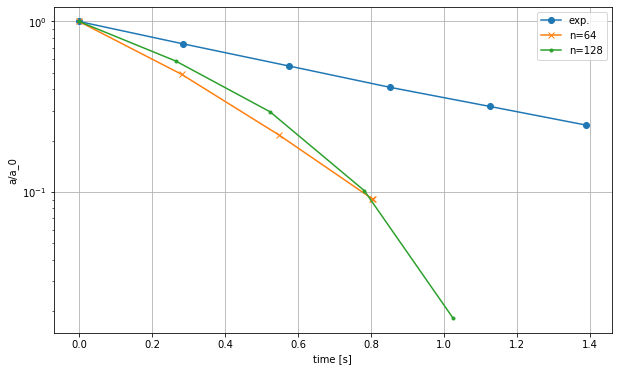

In [4]:
import numpy as np
import pandas as pd
from scipy.signal import argrelmax
import matplotlib.pyplot as plt
import mpld3

mpld3.enable_notebook()

def compute_plot_data(df, col_name):
    # Reference values
    R0 = 0.0062
    a0 = (0.00802 - R0)
    
    maxima = argrelmax(df[col_name].values)
    values_rel = [1.0]
    time_points = [0.0]
    
    for idx in maxima[0]:
        values_rel.append((df.loc[idx, col_name] - R0)/a0)
        time_points.append(df.loc[idx, "time"])
        
    return time_points, values_rel

# Read dataframe for each resolution and find the local maxima.
# These correspond to the points in the figure of the aforementioned paper
dfn64 = pd.read_csv("trinh1982.parameter_00000_template_copy_hexrefined/oscillatingDropletResults.csv")
dfn128 = pd.read_csv("trinh1982.parameter_00001_template_copy_hexrefined/oscillatingDropletResults.csv")

# Reference data
df_ref = pd.read_csv("reference_data/trinh1982_figure10_lw147.csv", comment="#")

# N = 64 cells 
times_n64, rel_amplitudes_n64 = compute_plot_data(dfn64, "semi-axes-x")

# N = 128 cells
times_n128, rel_amplitudes_n128 = compute_plot_data(dfn128, "semi-axes-x")

plt.figure(figsize=(10,6))
plt.grid()
plt.xlabel("time [s]")
plt.ylabel("a/a_0")

plt.semilogy(df_ref["time"], df_ref["relative_amplitude"], label='exp.', marker='o')
plt.semilogy(times_n64, rel_amplitudes_n64, label='n=64', marker='x')
plt.semilogy(times_n128, rel_amplitudes_n128, label='n=128', marker='.')

plt.legend()